# 1. Simple Linear Regression

## 1.1 Import and Load Dataset

In [1]:
# Hal pertama yang dilakukan untuk melakukan perhitungan Simple Linier Regression kita membutuhkan beberapa package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kemudian, kita bisa meng-import package untuk linear regression
import math
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supaya warning yang muncul tidak mengganggu, maka kita bisa ignore
import warnings
warnings.filterwarnings('ignore')

Kita menggunakan data dari boston house price

In [2]:
data_lin = pd.read_csv('hou_all.csv')
data_lin.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


target kita adalah medv (median value of house price)

coba kita cek datanya

In [3]:
data_lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


**MEDV** sebenarnya adalah dalam 1000 dollar, maka dari itu kita akan mengalikan **MEDV** dengan 1000 agar menjadi bentuk aslinya

In [4]:
data_lin['MEDV'] = data_lin['MEDV']*1000

In [5]:
data_lin.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36200.0


## 1.2 Selects Variable and Load Model

Sebelum melakukan linear regression yang pertama dilakukan ialah kita harus memilih fitur atau variabelnya terlebih dahulu untuk dipasangkan dengan target. Dalam pemilihan variabel/fitur kita dapat mencari korelasiya terlebih dahulu

cara mencari nilai korelasi adalah sebagai berikut:

In [6]:
data_lin.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


dari hasil di atas kita dapat mengetahui korelasi dari tiap fitur, tetapi yang sebenarnya kita ingin ketahui adalah relasi tiap fitur terhadap target kita yaitu **MEDV**. maka dari itu dapat kita lakukan sebagai berikut :

In [7]:
data_lin.corr()['MEDV'][:]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

nah hasil di atas adalah korelasi tiap fitur terhadap **MEDV**. Kita pilih korelasi yang paling kuat, korelasi yang semakin baik adalah yang semakin mendekati -1 atau 1, maka dari itu kita pilih **LSTAT**

In [8]:
X = data_lin[['LSTAT']] #jadikan bentuk dataframe
y = data_lin['MEDV'] #biarkan tetap data series

In [9]:
X

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
5,5.21
6,12.43
7,19.15
8,29.93
9,17.10


In [10]:
y

0      24000.0
1      21600.0
2      34700.0
3      33400.0
4      36200.0
5      28700.0
6      22900.0
7      27100.0
8      16500.0
9      18900.0
10     15000.0
11     18900.0
12     21700.0
13     20400.0
14     18200.0
15     19900.0
16     23100.0
17     17500.0
18     20200.0
19     18200.0
20     13600.0
21     19600.0
22     15200.0
23     14500.0
24     15600.0
25     13900.0
26     16600.0
27     14800.0
28     18400.0
29     21000.0
        ...   
476    16700.0
477    12000.0
478    14600.0
479    21400.0
480    23000.0
481    23700.0
482    25000.0
483    21800.0
484    20600.0
485    21200.0
486    19100.0
487    20600.0
488    15200.0
489     7000.0
490     8100.0
491    13600.0
492    20100.0
493    21800.0
494    24500.0
495    23100.0
496    19700.0
497    18300.0
498    21200.0
499    17500.0
500    16800.0
501    22400.0
502    20600.0
503    23900.0
504    22000.0
505    11900.0
Name: MEDV, Length: 506, dtype: float64

load model linear regression

In [11]:
clf = LinearRegression()
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Split train dan test

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

## 1.3 Fitting Model

Dalam melakukan fitting itu digunakan data training. Dimana dalam hal ini perbandingan untuk data training dan testing ialah 80% dan 20%

In [13]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Sebagaimana yang kita tahu bahwa dalam linear regression ada yang namanya *slope (m)* dan *intercept (b)*. Sekarang kita akan coba cek nilai dari keduanya

In [14]:
clf.coef_ #slope

array([-931.61344849])

In [15]:
clf.intercept_ #intercept

34159.97393021138

maka dari itu rumus yang didapatkan untuk melakukan prediksi adalah sebagai berikut :

### MEDV = (-931.61344849 * *LSTAT*) + 34159.97393021138

sekarang kita akan lakukan prediksinya untuk datatest

In [16]:
pred = clf.predict(X_test)

In [17]:
pd.DataFrame({'actual':y_test,'prediction':pred})

,actual,prediction
48,14400.0,5456.963582
64,33000.0,26660.485670
473,29800.0,23297.361121
485,21200.0,24303.503645
228,46700.0,30508.049212
389,11500.0,14735.833529
462,19500.0,21126.701786
61,16000.0,20707.475734
482,25000.0,27629.363656
465,19900.0,20996.275903


## 1.4 Scoring Time

Ketika kita telah mendapatkan data dari aktual sama prediksi sekarang waktunya kita melakukan scoring terhadap model yang telah kita latih

- mean squarred error

In [18]:
mean_squared_error(y_test,pred)

49322806.705411874

- mean absolute error

In [19]:
mean_absolute_error(y_test,pred)

5303.1628518232155

- r2-score

In [20]:
r2_score(y_test,pred)

0.543636834528461

berdasarkan hasil di atas kita harus mengakui bahwa model kita kurang bagus dilihat dari r2_score yang didapat hanya 0.54 atau 54% saja. Sekarang kita akan lihat bentuk plotnya

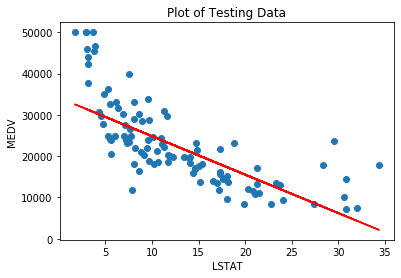

In [21]:
plt.scatter(X_test, y_test) #data aktual
plt.plot(X_test,pred,color = 'r') #model prediksi
plt.title('Plot of Testing Data')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

hasil di atas adalah model yang sudah kita buat, sebenarnya prediksi kita sudah mendekati pusat persebaran data tapi memang ada beberapa data yang masih jauh dari prediksi

# 2. Multiple Linear Regression

## 2.1 Select All and Split Them

Kita akan mencoba melakukan linear regression dengan menyertakan semua fitur. Caranya sama kita pisahkan x untuk fitur dan y untuk target

In [22]:
X = data_lin.drop('MEDV', axis = 1)
y = data_lin['MEDV']

In [23]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [24]:
y

0      24000.0
1      21600.0
2      34700.0
3      33400.0
4      36200.0
5      28700.0
6      22900.0
7      27100.0
8      16500.0
9      18900.0
10     15000.0
11     18900.0
12     21700.0
13     20400.0
14     18200.0
15     19900.0
16     23100.0
17     17500.0
18     20200.0
19     18200.0
20     13600.0
21     19600.0
22     15200.0
23     14500.0
24     15600.0
25     13900.0
26     16600.0
27     14800.0
28     18400.0
29     21000.0
        ...   
476    16700.0
477    12000.0
478    14600.0
479    21400.0
480    23000.0
481    23700.0
482    25000.0
483    21800.0
484    20600.0
485    21200.0
486    19100.0
487    20600.0
488    15200.0
489     7000.0
490     8100.0
491    13600.0
492    20100.0
493    21800.0
494    24500.0
495    23100.0
496    19700.0
497    18300.0
498    21200.0
499    17500.0
500    16800.0
501    22400.0
502    20600.0
503    23900.0
504    22000.0
505    11900.0
Name: MEDV, Length: 506, dtype: float64

Sekarang kita buat modelnya

In [25]:
clf = LinearRegression()

lalu split train dan test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=45)

In [27]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Kita masih bisa mengetahui nilai *slope (m)* dan *intercept (b)* nya

In [28]:
clf.coef_

array([-1.14465640e+02,  4.81003639e+01, -2.93283702e+01,  2.33153463e+03,
       -1.75235298e+04,  3.71594611e+03,  8.47103543e+00, -1.53370335e+03,
        3.03126789e+02, -1.14912484e+01, -8.97559331e+02,  9.23322492e+00,
       -5.30996642e+02])

In [29]:
clf.intercept_

35872.632073694345

Hasil di atas menghasilkan rumus sebagai berikut :

### MEDV = -114.46564CRIM + 48.10036ZN + (-29.3283702 * *INDUS*) + 2331.53463 * *CHAS* + *NOX* + *RM* + *AGE* + *DIS* + *RAD* + *TAX* + *PTRATIO* + *B* + *LSTAT*

Sekarang kita akan lakukan prediksi

In [30]:
pred_2 = clf.predict(X_test)

In [31]:
pd.DataFrame ({'actual':y_test, 'pred_1':pred, 'pred_2':pred_2})

,actual,pred_1,pred_2
48,14400.0,5456.963582,9127.484277
64,33000.0,26660.485670,23226.074045
473,29800.0,23297.361121,25434.917566
485,21200.0,24303.503645,21939.121061
228,46700.0,30508.049212,35036.968498
389,11500.0,14735.833529,14443.125771
462,19500.0,21126.701786,19795.918206
61,16000.0,20707.475734,18772.732783
482,25000.0,27629.363656,28441.562106
465,19900.0,20996.275903,17682.870178


Hasil di atas adalah hasil prediksi dari simple dan multivariable linear regression

In [32]:
mean_squared_error(y_test, pred_2)

27949660.33154886

In [33]:
mean_absolute_error(y_test, pred_2)

3887.2075852609173

In [34]:
r2_score(y_test, pred_2)

0.7413935597999861

Hasil di atas mendapatkan hasil yang lebih baik dimana r2 scorenya mendapatkan 74%

# 3. Bonus Interactive

Kita akan membuat aplikasi linear regression yang interaktif

In [35]:
from IPython.display import SVG
from IPython.display import display
from ipywidgets import interactive

Tujuan dari perintah diatas sebenarnya simple. Ketiga syntax diatas bertujuan untuk mengubah gambar menjadi interactive sesuai dengan keinginan kita.

In [36]:
lm = LinearRegression()

def plot_reg(feature, target, test_size):
    # feature matrix
    X = data_lin [[feature]]
    y = data_lin [target]
    X_train,X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.2, random_state=45)
    lm.fit(X_train, y_train)

    f = plt.figure(figsize = (15,15))

    plt.subplot(221)
    sns.regplot(x = X_train, y = y_train, data = data_lin, ci 
    = None);
    plt.xlabel(feature)
    t1 = lm.score(X_train, y_train)
    plt.title ('Training - R2 score:%f' %t1)
    
    lm.predict(X_test)

    plt.subplot(222)
    sns.regplot(x = X_test, y = y_test, data = data_lin,
    ci=None);
    plt.xlabel(feature)
    t2 = lm.score(X_test, y_test)
    plt.title('Testing - r2 score:%f' %t2)

inter = interactive(plot_reg, feature = list(data_lin.columns), target = ["MEDV"],test_size = [.05, .10, .15, .20, .25, .30, .35, .40, .45, .50])
display (inter)

interactive(children=(Dropdown(description='feature', options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AG…

# 4. Logistic Regression

## 4.1 Load and Preprocess Data

kita akan gunakan data Default.csv

In [37]:
data_log = pd.read_csv('Default.csv')
data_log.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


hasil di atas adalah data yang akan kita gunakan. Nah disitu ada **Unnamed: 0** yang harus dihapus dulu, lalu **default** dan **student** harus diubah kebentuk angka dulu

In [38]:
data_log = data_log.drop(['Unnamed: 0'], axis=1)

In [39]:
data_log.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


nah sekarang kita ubah di **default** yang *No* jadi *0* dan yang *Yes* jadi *1*. Salah satu caranya seperti ini :

In [40]:
data_log.loc[data_log['default']=='No','default'] = 0
data_log.loc[data_log['default']=='Yes','default'] = 1
#gunakan fungsi loc, parameter pertama untuk value mana yang mau diganti, kedua untuk kolom mana yang mau diganti

sekarang kita ubah yang **student**

In [41]:
data_log.loc[data_log['student']=='No','student'] = 0
data_log.loc[data_log['student']=='Yes','student'] = 1

sekarang kita coba cek

In [42]:
data_log.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


yaps syudah terubah~

## 4.2 Fitting Model

bikin dulu modelnya

In [43]:
clf = LogisticRegression() 

bagi X dan y nya. X atau fiturnya kita pakai **balance** sedangkan y atau targetnya adalah **default**

In [44]:
X = data_log[['balance']]
y = data_log['default']

In [45]:
X.head()

,balance
0,729.526495
1,817.180407
2,1073.549164
3,529.250605
4,785.655883


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

setelah dibagi X dan y sekarang kita lakukan train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=45)

sekarang kita fitting data dengan logistic regression

In [48]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
clf.coef_

array([[0.00423834]])

In [50]:
clf.intercept_

array([-8.60235278])

sebenarnya bentuknya mirip seperti yang linear regression, berdasarkan hasil di atas dapat kita rumuskan menjadi :

### *default* = (0.00423834 * *balance*) + (- 8.60235278)

nah yang perlu kita pikirkan adalah bagaimana membuatnya menjadi bentuk sigmoid agar hasilnya bisa menjadi 0 atau 1

## 4.3 How to Calculate

sekarang kita coba hitung dulu, kita ambil sampel satu data

In [51]:
X_train.head()

,balance
4643,334.466420
2390,1264.586941
6162,1160.827632
8678,325.870131
6944,730.962752


kita coba yang paling atas, kita coba masukkan ke persamaan di atas

In [52]:
(0.00423834 * 334.466420) - 8.60235278

-7.1847703734572

nah kita sudah dapat nilai y nya. Sekarang kita gunakan rumus logistic regression

*p = e^y / (e^y)+1*

coba kita cek nilai p nya

In [53]:
math.exp(-7.1847703734572) / (math.exp(-7.1847703734572)+1)

0.0007574688607530713

nah kita dapat nilainya, kalau kita lihat disitu peluang kelas 1 sangat kecil sekali.

Sekarang kita cek dengan predict dan predict_proba, kita pake trainnya dulu buat ngecek

In [66]:
clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Predict itu gunanya buat memprediksi langsung hasilnya

nah kalau kita mau nyoba liat hasil perbandingan peluang kelas 0 atau 1 nya kita pakai predict_proba

In [55]:
clf.predict_proba(X_train)

array([[9.99242531e-01, 7.57469317e-04],
       [9.62406330e-01, 3.75936697e-02],
       [9.75454344e-01, 2.45456555e-02],
       ...,
       [9.85476531e-01, 1.45234692e-02],
       [9.98578710e-01, 1.42128965e-03],
       [9.98665146e-01, 1.33485403e-03]])

nah itu hasilnya, disitu ada 2 kolom, kolom pertama itu peluang untuk jadi 0 (*No*) (*q*) dan yang kedua itu peluang untuk jadi 1 (*Yes*) jadi kita bisa bandingkan peluangnya

In [56]:
q = 9.99242531e-01
p = 7.57469317e-04

In [57]:
p

0.000757469317

In [58]:
q

0.999242531

lebih besar nilai q kan? berarti harusnya kelas **default**nya 0, coba kita cek

In [59]:
y_train.head(1)

4643    0
Name: default, dtype: int64

nah bener kan ehe

## 4.4 Plotting Time

setelah membuat modelnya sekarang kita coba plot dulu datanya menggunakan seaborns

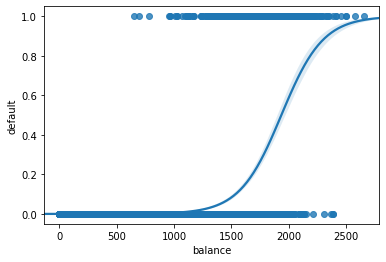

In [83]:
sns.regplot(x='balance',y='default', data = data_log, logistic=True)
plt.show()

dari gambar di atas kita bisa lihat bahwa jika X nya berada di bawah 500 lebih cenderung defaultnya 0. Dari model tersebut juga kita bisa menghitung probability tiap data apakah dia defaultnya 0 atau 1

## 4.5 Testing Data

sekarang kita coba dengan datatest.

coba cek dulu clfnya (modelnya)

In [67]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

sekarang kita ingin mendapatkan hasil prediksinya

In [68]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

nah di atas adalah hasil prediksinya. Sekarang kita cek perbandingan peluangnya

In [69]:
clf.predict_proba(X_test)

array([[9.90505827e-01, 9.49417282e-03],
       [9.20026126e-01, 7.99738735e-02],
       [9.98262335e-01, 1.73766513e-03],
       ...,
       [9.95208500e-01, 4.79149964e-03],
       [9.09649054e-01, 9.03509459e-02],
       [9.99816361e-01, 1.83639412e-04]])

In [78]:
predict = clf.predict(X_test)
hasil = pd.DataFrame({'balance' : X_test['balance'],'default_real' : y_test, 'predict' : predict})
hasil

,balance,default_real,predict
4132,933.104366,0,0
6553,1453.316173,0,0
7604,530.603503,0,0
585,830.171511,0,0
5924,375.306305,0,0
9642,396.844085,0,0
2846,1157.759857,0,0
9751,1569.302757,0,0
1891,775.443928,0,0
3367,783.122960,0,0


nah di atas adalah hasil prediksi kita. Sekarang kita coba cek r2 score nya

In [75]:
r2_score(y_test, predict)

0.16256390515360886

ternyata hasilnya hanya 0.16 saja :(

untuk plotnya sendiri seperti di bawah

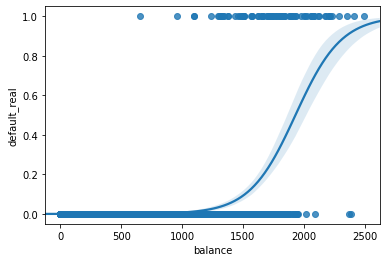

In [80]:
sns.regplot(x='balance',y='default_real', data = hasil, logistic=True)
plt.show()